In [52]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Session 5


In [4]:
iris_data = datasets.load_iris()
iris_data.keys()

dict_keys(['DESCR', 'data', 'target', 'target_names', 'feature_names'])

In [5]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


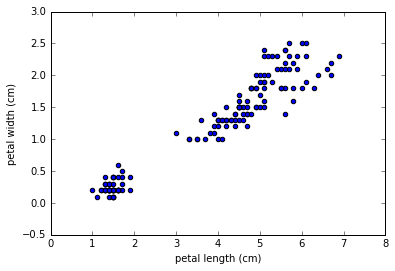

In [7]:
iris_df.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)")

In [8]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(iris_df)
labels = kmeans.labels_

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(iris_df, labels)

0.55259194452136762

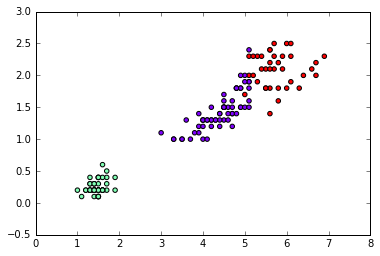

In [10]:
x="petal length (cm)"
y="petal width (cm)"
plt.scatter(iris_df[x], iris_df[y], c=labels, cmap="rainbow")

In [11]:
pca = PCA(n_components=2)
pca.fit(iris_df)
components = pca.components_
components

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

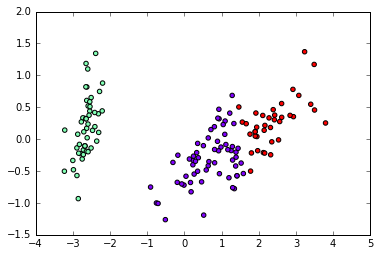

In [12]:
iris_red = pca.transform(iris_df)
plt.scatter(iris_red[:,0], iris_red[:,1], c=labels, cmap="rainbow")

In [15]:
sleed_df = pd.read_csv("https://raw.githubusercontent.com/loehndorf/dmds/master/data/mammal_sleep.csv",
                      index_col=0)
sleed_df.head()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
Species,,,,,,,,,,
Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [20]:
sleed_df_repaired = sleed_df.fillna(sleed_df.mean())

In [51]:
n_comp = 2
std = sleed_df_repaired.std()
sleed_std = sleed_df_repaired/std
pca = PCA(n_components=n_comp)
pca.fit(sleed_std)
sleep_red = pca.transform(sleed_std) 
sleep_red_inv = pca.inverse_transform(sleep_red)
sleed_red_df = pd.DataFrame(sleep_red_inv, columns=sleed_df.columns, index=sleed_df.index)
sleed_df_repaired = sleed_df.combine_first(sleed_red_df*std)
sleed_df_repaired.head()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
Species,,,,,,,,,,
Africanelephant,6654.000,5712.0,-4.323292,0.320526,3.3,38.600000,645.0,3,5,3
Africangiantpouchedrat,1.000,6.6,6.300000,2.000000,8.3,4.500000,42.0,3,1,3
ArcticFox,3.385,44.5,11.363130,3.197436,12.5,14.000000,60.0,1,1,1
Arcticgroundsquirrel,0.920,5.7,9.758267,1.982156,16.5,9.098639,25.0,5,2,3
Asianelephant,2547.000,4603.0,2.100000,1.800000,3.9,69.000000,624.0,3,5,4


## Homework

Names: (put your names here)

### Exercise 1

Plot the silhouette for a different number of clusters, for unscaled and scaled data in two separate plots.

### Exercise 2
Implements a class for k-means clustering that uses stochastic gradient descent. Store labels and cluster centers as  attributes. Apply your stochastic gradient cluster method to the iris data. Then plot the clustering using the labels determined by the algorithm and compare your result with that of batch k-means.

### Exercise 3
Implement a method to impute missing values that iteratively applies the above matrix repair step. Optional: use cross validation by randomly removing known values to determine the optimal number of pricipal components.